<a href="https://colab.research.google.com/github/itssofiarce/MINERIA/blob/main/TP2_Mineria_Arce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico Minería de Datos 2024
## Docentes
- Spetale, Flavio
- Pellerejo, Ivan
- Gatti, Ramiro

## Integrante
- Sofía Arce


# Preparacion del entorno

In [1]:
import os

REPO_NAME = "MINERIA"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/itssofiarce/MINERIA.git
  os.chdir(REPO_NAME)

Cloning into 'MINERIA'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 65 (delta 14), reused 12 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 3.04 MiB | 7.13 MiB/s, done.
Resolving deltas: 100% (14/14), done.


# Librerías


In [15]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Analisis exploratorio - Companies dataset


In [4]:
df = pd.read_csv('/content/MINERIA/tp2_2024/1000_Companies.csv')

In [5]:
df.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [8]:
df.isna().sum()

,0
RyD_Spend,0
Administration,0
MarketingSpend,0
State,0
Profit,0


### Distribucion de las variables


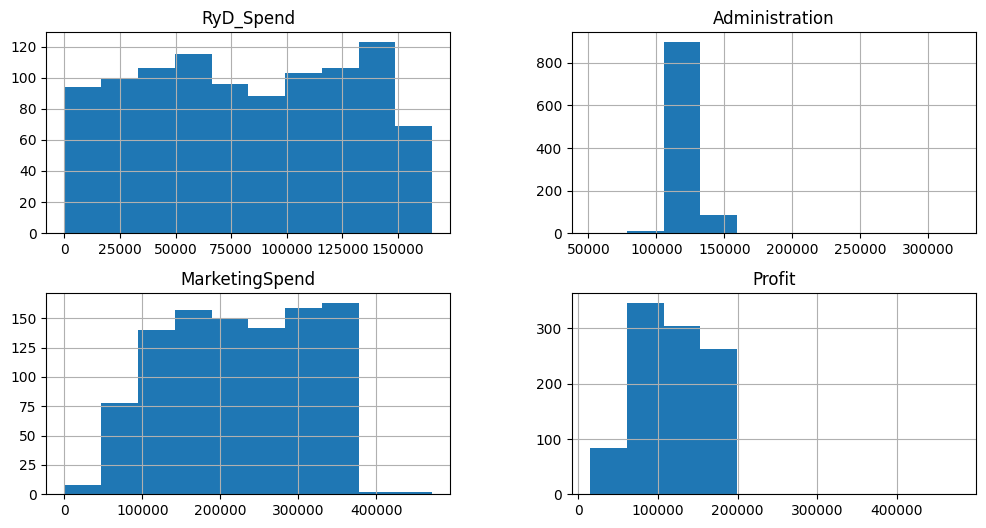

In [10]:
df.hist(figsize=(12, 6))
plt.show()

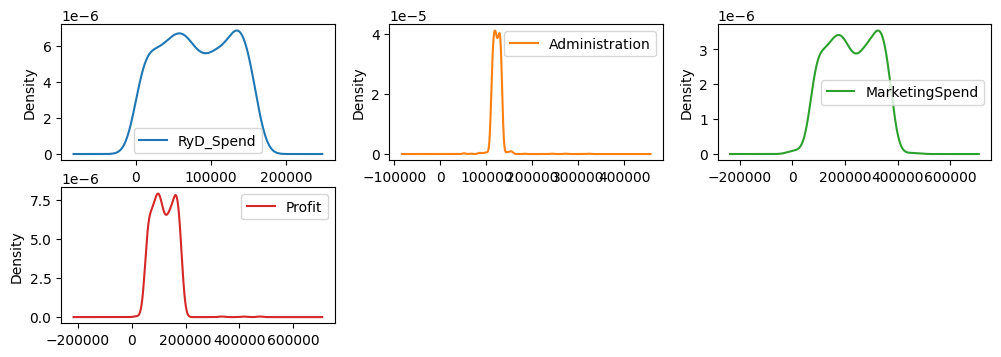

In [11]:
# Calcular si las variables se distribuyen normalmente
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(12, 6))
plt.show()

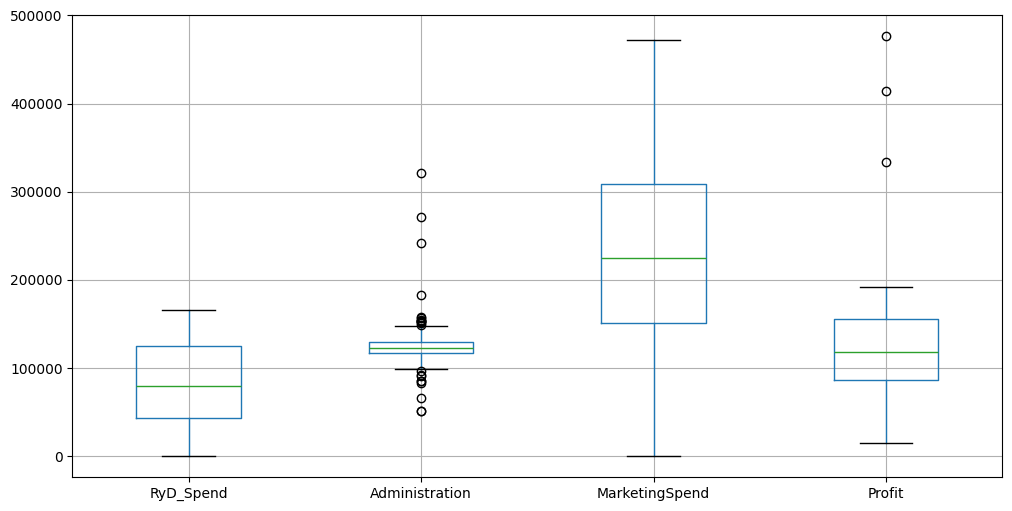

In [9]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.show()


## Estandarización de los datos


División previa en train y test para evitar la fuga de datos

In [17]:
# Division en train y test 80-20

X = df.iloc[:, :3]
y = df.iloc[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)